<a href="https://colab.research.google.com/github/Kianjputnam/project_chd/blob/main/Final_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coronary Heart Disease Project
## by Eleanor Byrd, Ashley Whitehouse, Kian Putnam

 ### **Summary**

The focus of this project was to build algorithms that predict how likely it is for someone to develop coronary heart disease based on a variety of factors. In order to do this, we had to figure out which factors were the most important and accurate predictors of heart disease. Our methods for answering this question involved analyzing how the different variables in the Framingham Heart Study dataset related and interacted with each other through a series of visualizations, including a correlation matrix, a bar graph, and box plots. These visualizations helped us understand the distribution of the data and its outliers. The graphs also showed which variables correlated the most with having coronary heart disease. After exploring the different variables with the graphs, short decision trees were created to find the variables that are most predictive of coronary heart disease risk. A total of four decision trees were created, and for each tree, the variables were interacted and regressed to get a R^2 prediction value. The results from these four trees were then used to create a final model with the highest possible R^2 value. The final model was created using the variables age, cigsPerDay, diaBP, sysBP, sex, BMI, heartRate, and glucose. Once the tree was winsorized and expanded to interact with the variables, the regression had an R^2 of 0.1132. Although this R^2 value is relatively low, it is important to consider that health conditions are caused by many different lifestyle and genetic factors. The fact that 11.32% of the variance in the risk of coronary heart disease can be explained by the variables in our model shows that these factors do play a role in predicting how likely it is for someone to develop this disease. This information can ultimately be used to guide lifestyle changes for people who are predicted to be at risk for coronary heart disease.



### **Data**

The data, which was collected through the Framingham Heart Study, has several variables that are believed to be related to the development of cardiovascular disease. The cleaning of this data can be found in Chd_Cleaning.ipynb. The variables we decided to use in our predictive model are listed below, along with how they were cleaned for our analysis. For categorical variables, we decided to drop all 'na' values since they can be problematic in predictive models. This only removed 3.3% of the testing data and 3.8% of the training data. We also decided to map the variable encodings to their coresponding categorical values in new columns, so that our models can run with the one-hot encodings and the graphs can be made with categorical values.

For numerical variables, we decided to all 'na' values into the median value for the variable.


**sex:**

This variable is the sex of the patient, where 0 indicates female and 1 indicates male. This variable had no 'na' values to drop. In a new variable called 'sex_category', all of the 0 values were mapped to 'female' and all of the 1 values were mapped to 'male'.


**age:**

This variable is the age, in years, of the patient's medical evaluation. There were no 'na' values to drop, so no changes were made to the age data.



**cigsPerDay:**

This variable is the number of cigarettes the patient smokes per day. There were 5 'na' values for this variable. Each missing value was replaced with the median number of cigarettes smoked per day.



**sysBP:**

This is the patient's systolic blood pressure (mmHg) at the time of the examination. There were no 'na' values to drop and no mapping was needed for this numerical variable.


**diaBP:**

This is the patient's diastolic blood pressure (mmHg) at the time of the examination. There were no 'na' values to drop and no mapping was needed for this numerical variable.


**BMI:**

This is the patient's body mass index (weight (kg)/height (m)^2) at the time of the examination. There were 4 'na' values for this variable. Each missing value was replaced with the median BMI.


**heartRate:**

This is the patient's heart rate (beats/minute) at the time of the examination. There was only 1 'na' value for this variable and it was replaced with the median heart rate.


**glucose:**

This is the patient's glucose level (mg/dl) at the time of the examination. There were 101 'na' values for this variable. Each missing value was replaced with the median glucose value.


**TenYearCHD:**

This indicates whether the patient had coronary heart disease in 10 years. There were no 'na' values to drop. In a new variable called 'chd_category', the 0 values were mapped to 'no chd' and the 1 values were mapped to 'chd'.

The variables that were not used can be found in the apendix section.

### **Results**

The following graphs were created to get a better sense of how the variables are related to each other.

**Correlation Matrix:**

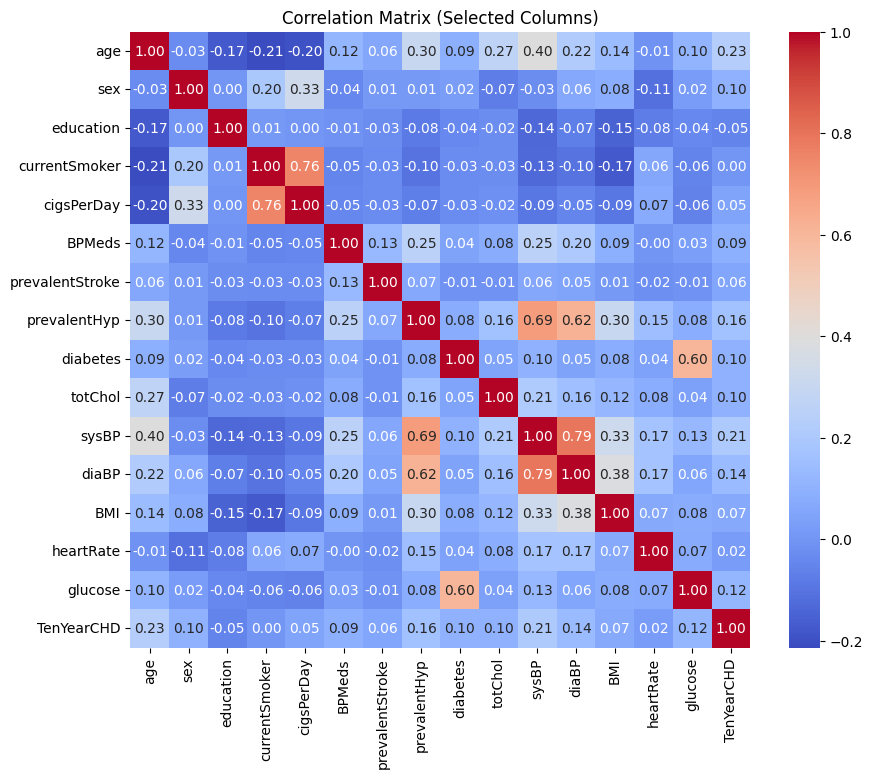

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

clean_chd_train = pd.read_csv("./clean_chd_train.csv")

selected_corr_columns = ['age','sex','education','currentSmoker','cigsPerDay','BPMeds',
                         'prevalentStroke','prevalentHyp','diabetes','totChol','sysBP',
                         'diaBP','BMI','heartRate','glucose','TenYearCHD'
                         ]

# Select only the specified columns
train_selected = clean_chd_train[selected_corr_columns]

# Calculate correlation matrix
correlation_matrix_selected = train_selected.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Selected Columns)')
plt.show()


> From this correlation matrix, we can see that age, sysBP, prevalentHyp, diaBP, and glucose have the highest correlation with TenYearCHD.




**Bar Graph:**

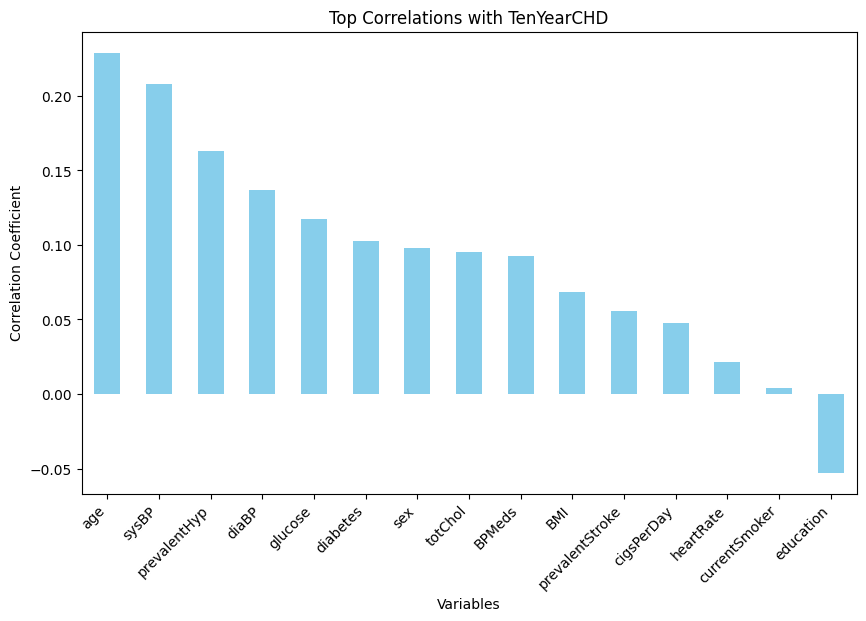

In [3]:
top_correlations = correlation_matrix_selected['TenYearCHD'].sort_values(ascending=False).drop('TenYearCHD')

plt.figure(figsize=(10, 6))
top_correlations.plot(kind='bar', color='skyblue')
plt.title('Top Correlations with TenYearCHD')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

> This bar graph provides another view of how strongly the different variables correlate with TenYearCHD.

**Bar Plots:**

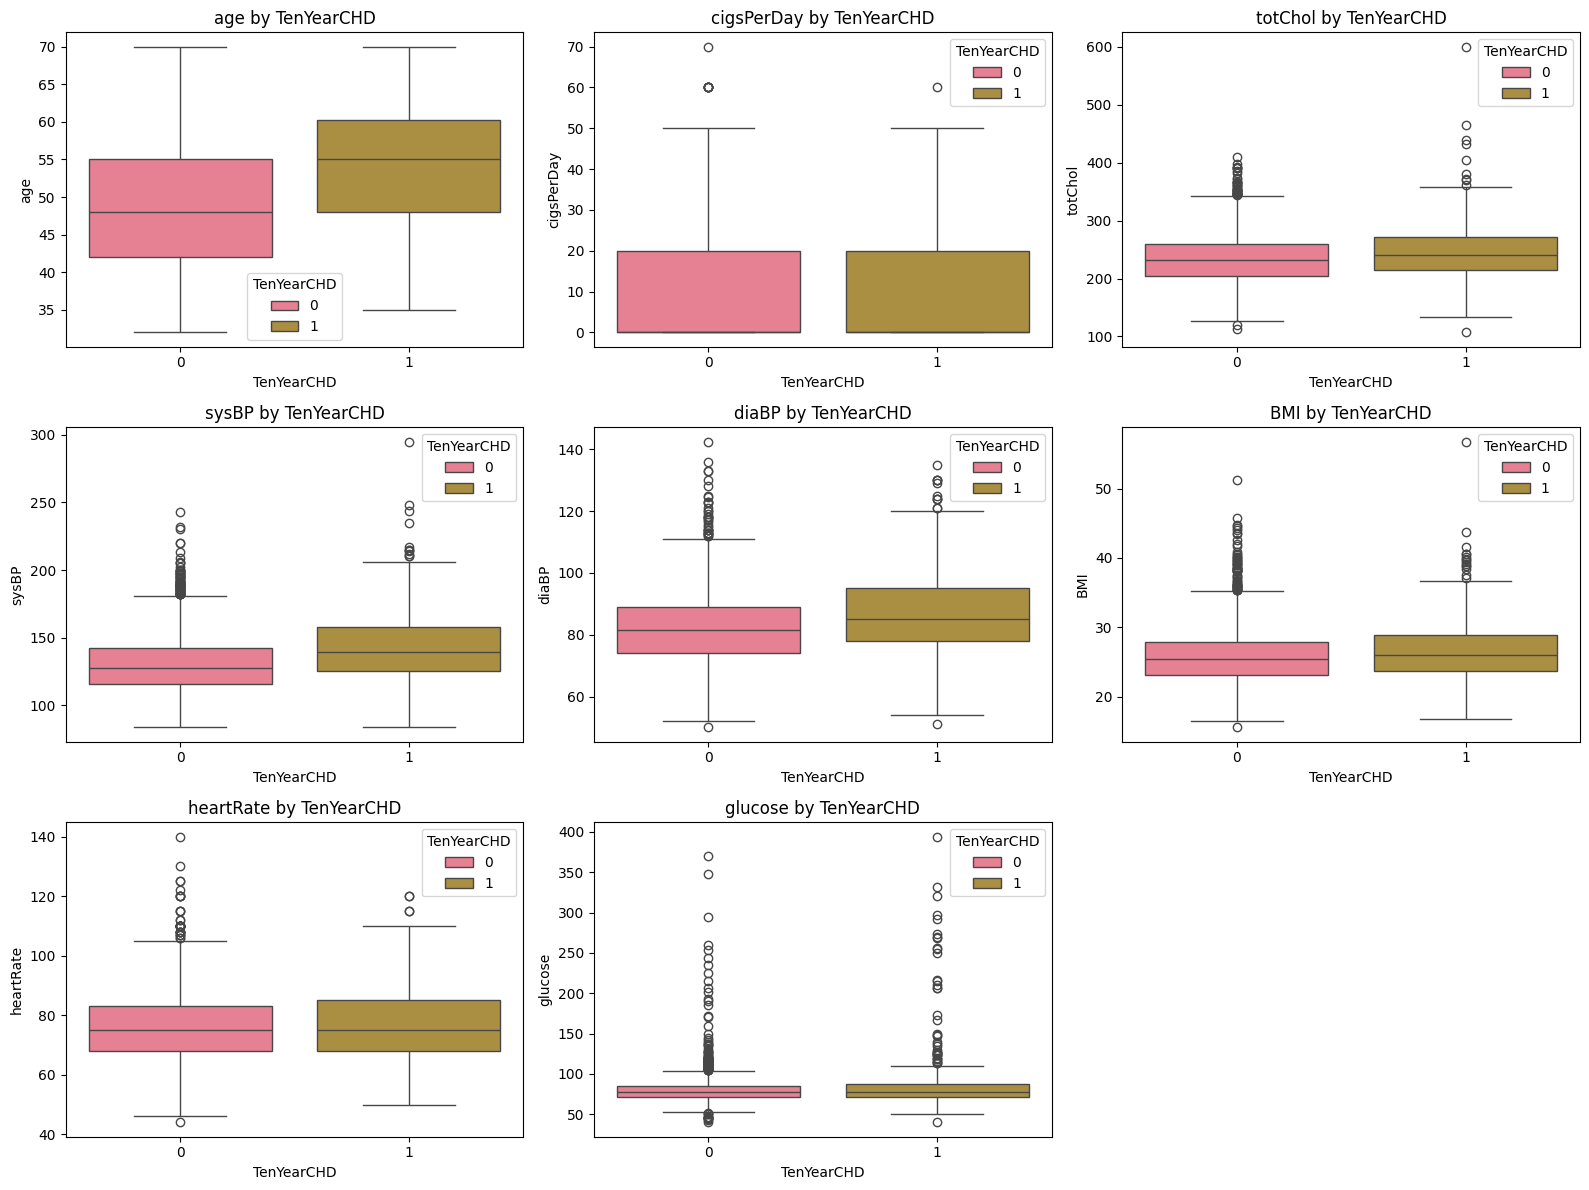

In [4]:
# Set color palette
sns.set_palette("husl")

# Select variables of interest
variables_of_interest = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
data_subset = clean_chd_train[variables_of_interest]

# Melt the DataFrame to long format
data_melted = data_subset.melt(id_vars=['TenYearCHD'], var_name='Variable', value_name='Value')

# Filter data for TenYearCHD values
data_filtered = data_melted[data_melted['Variable'] != 'TenYearCHD']

# Create box plots for each variable
plt.figure(figsize=(16, 12))
for idx, var in enumerate(data_filtered['Variable'].unique()):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(x='TenYearCHD', y='Value', data=data_filtered[data_filtered['Variable'] == var], hue='TenYearCHD')
    plt.title(f'{var} by TenYearCHD')
    plt.xlabel('TenYearCHD')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


> These boxplots show the distribution of data for each variable. It is apparent that there is a high number of outliers for all of the variables, except for age and cigsPerDay.

Multiple short decision trees were made in order to find the variables in the dataset that are most predictive of CHD risk. All of the code that was used to create these trees can be found in chd_models.ipynb.

First, a decision tree with a maximum depth of 3 and a minimum leaf sample of 50 was created. From this tree, it was found that age, cigsPerDay, diaPB, sysBP, and sex were the most important variables for predicting CHD risk. The R^2 for the regression of the model was .0888 before winsorizing the outliers and increased to . 0892 after winsorizing. After interacting all of the variables with a degree 2, the R^2 increased to .1091.

The second tree had a maximum depth of 3 and no specification for the minimum leaf sample. It was found that age, glucose, sysBP, totChol, sex, and prevalentHyp were important variables for this model. The R^2 for this model was .0825 before winsorizing the outliers and increased to . 0830 after winsorizing. After interacting all of the variables with a degree 2, the R^2 decreased to -.1712.

The third tree had a maximum depth of 4 and no specification for the minimum leaf sample. It was found that age, glucose, cigsPerDay, BMI, sysBP, and sex were the most important variables for the tree. Before winsorizing, the R^2 was .0947 and after winsorizing, the R^2 was .0942. With winsorizing and interacting all of the variables, the R^2 was -.2413.

The fourth decision tree that was created had a maximum depth of 4 and a minimum leaf sample of 50. The important variables from this tree were age, cigsPerDay, diaBP, BMI, sysBP, sex, heartRate, and glucose. A regression without winsorizing had an R^2 of .0938 and a regression with winsorizing had an R^2 of .0930. The R^2 decreased to -.296 when there was winsorizing and all the variables were interacted with degree 2.

After these models were created, it was found that the first model that interacted age, cigsPerDay, diaPB, sysBP, and sex had the highest R^2. The third tree had the next highest R^2 when the model did not interact age, glucose, cigsPerDay, BMI, sysBP, and sex. The final tree had the third highest R^2 when there was no interaction between age, cigsPerDay, diaBP, BMI, sysBP, sex, heartRate, and glucose. Because of these results, it was decided to combine these models, using the variables age, cigsPerDay, diaBP, sysBP, sex, BMI, heartRate, and glucose. The data was winsorized to control for outliers and then expanded to interact with the subset from the first model (age, cigsPerDay, diaBP, sysBP, and sex). The BMI, heartRate, and glucose variables from the third and fourth models were then added without interacting them. Regressing on this combination resulted in an R^2 of 0.1132, which is the highest R^2 out of all of the models.

### **Conclusion**

The goal of this project was to identify which variables in the dataset are important for predicting the risk of developing coronary heart disease in 10 years. After creating four different decision trees it was found that age, cigsPerDay, diaBP, sysBP, sex, BMI, heartRate, and glucose were the most important variables in the highest performing models. Because of this, we decided to use these variables in our final predictive model. We also decided to interact the variables on age, cigsPerDay, diaBP, sysBP, and sex because doing so in the first model caused the R^2 value to increase. We also decided to winsorize the data in order to control the outliers, and this caused the R^2 value of our final predictive model to increase. Due to the high number of outliers in the data, it is important that outliers are controlled for in order to have a more accurate model. This regression resulted in an R^2 value of 0.1132, which was higher than the R^2 values for the initial four trees.

This R^2 value means that about 11.32% of the variance in whether or not a person gets coronary heart disease is explained by the variables that we included in the model. Although this R^2 value seems relatively low, we must interpret it in the context of the data and study. Health conditions, such as coronary heart disease, are caused by a lot of different lifestyle and genetic factors. This makes creating a single model that predicts the likelihood of developing a health condition very challenging. The fact that our model was able to show that age, smoking, blood pressure, sex, BMI, heart rate, and glucose can explain a small amount of what causes people to develop heart disease is still significant and could help identify individuals who are prone to developing the disease. This information could be used to help people at risk of coronary heart disease make lifestyle changes that decrease their chances of developing the disease.

Additional work could be done to create a more accurate and complete predictive model for coronary heart disease that has a higher R^2 value. In order to do this, we could use a more sophisticated and advanced model than decision trees. This might allow us to better capture the interactions between the many variables in the data and illustrate more complex relationships. We could also combine models to further increase the accuracy of the predictions.

In addition to using a more complex model, a more accurate prediction could be made by having data from a more diverse population. Currently, the Framingham Heart Study only includes data from people who are from Framingham, Massachusetts. The demographics of this area may not be diverse enough to generalize the results to a wider population of people. The dataset may also be missing other important variables that more strongly correlate with developing coronary heart disease. Increasing the number of variables that are recorded in the dataset to include more information, such as family history of heart disease, could lead to the creation of a more accurate model.


### **Apendix**

The following variables were cleaned but not used in the model.

**education:**

This variable is the patient's highest level of education that has been completed. The 'na' values were dropped. In a new variable called 'edu_category', all of the numerical values were mapped to the propper categories. All of the 1 values were mapped to 'some HS', the 2 values were mapped to 'HS/GED, the 3 values were mapped to 'some college/vocation', and the 4 values were mapped to 'college'.

**currentSmoker:**

This variable indicates wheter the patient currently smokes, where 0 means no and 1 means yes. There were no 'na' values to drop. In a new variable called 'smoker_category', all 0 values were mapped to 'no smoking' and all 1 values were mapped to 'smoking'.


**totChol:**

This variable is the patient's cholesterol (mg/dl) at the time of the examination. There were 11 'na' values for this variable. Each missing value was replaced with the median total cholesterol.

**prevalentStroke:**

This indicates whether the patient has had a stroke. There were no 'na' values to drop. In a new variable 'stroke_category', 0 values were mapped to 'no stroke' and 1 values were mapped to 'had stroke'.


**prevalentHyp:**

This indicates whether the patient was hypertensive. There were no 'na' values to drop. In a new variable 'hyp_category', 0 was mapped to 'no hyp' and 1 was mapped to 'hyp'.

**BPMeds:**

This variable indicates whether a patient used anti-hypertensive medication at the time they were examined. The 'na' values were dropped. In a new variable 'BPMeds_category', 0 values were mapped to 'no meds' and 1 values were mapped to 'on meds'.

**diabetes:**

This shows whether the patient was diabetic. There were no 'na' values to drop. In a new variable called 'diabetes_category', 0 values were mapped to 'no diabetes' and 1 values were mapped to 'diabetes'.